# Parkinson's Disease


---


**This project is part of the Udemy course "Machine Learning in Healthcare"**


---


The dataset can be found [here](https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection). 

The dataset is very small, with only about 195 entries, and consists of the following columns:
1. name - ASCII subject name and recording number.
2. MDVP:Fo(Hz) - Average vocal fundamental frequency.
3. MDVP:Fhi(Hz) - Maximum vocal fundamental frequency.
4. MDVP:Flo(Hz) - Minimum vocal fundamental frequency.
5. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several
measures of variation in fundamental frequency.
6. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude.
7. NHR, HNR - Two measures of ratio of noise to tonal components in the voice.
8. status: Health status of the subject (one) - Parkinson's, (zero) - Healthy.
9. RPDE, D2 - Two nonlinear dynamical complexity measures.
10. DFA - Signal fractal scaling exponent.
11. spread1, spread2, PPE - Three nonlinear measures of fundamental frequency variation.

Parkinson's disease is a chronic neurodegenerative disease that affects the neurons in the brain that contain dopamine and does not have cure. It affects the patients' movements and causes stiffness and tremor.

We would like to predict whether the patient has Parkinson's disease or not, given the various factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Parkinson's Disease Prediction Dataset/Parkinson_disease.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


We drop the name:

In [3]:
data.drop('name', axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

There are no null values.

Check the target variable, status:

Target variable count: 
1    147
0     48
Name: status, dtype: int64


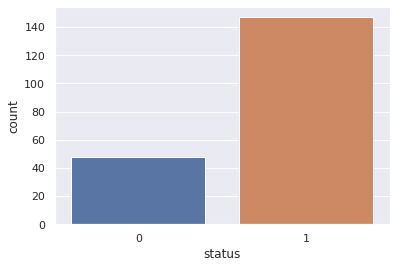

In [4]:
sns.countplot(x = 'status', data = data)
print('Target variable count: ')
print(data['status'].value_counts())

It seems that there are a lot of candidates who suffer from Parkinson's disease rather than Healthy candidates. Thus, any predictions could be skewed towards detecting patients with Parkinson's. This could infact lead to a large number of False Negatives.

Let us find the correlation:

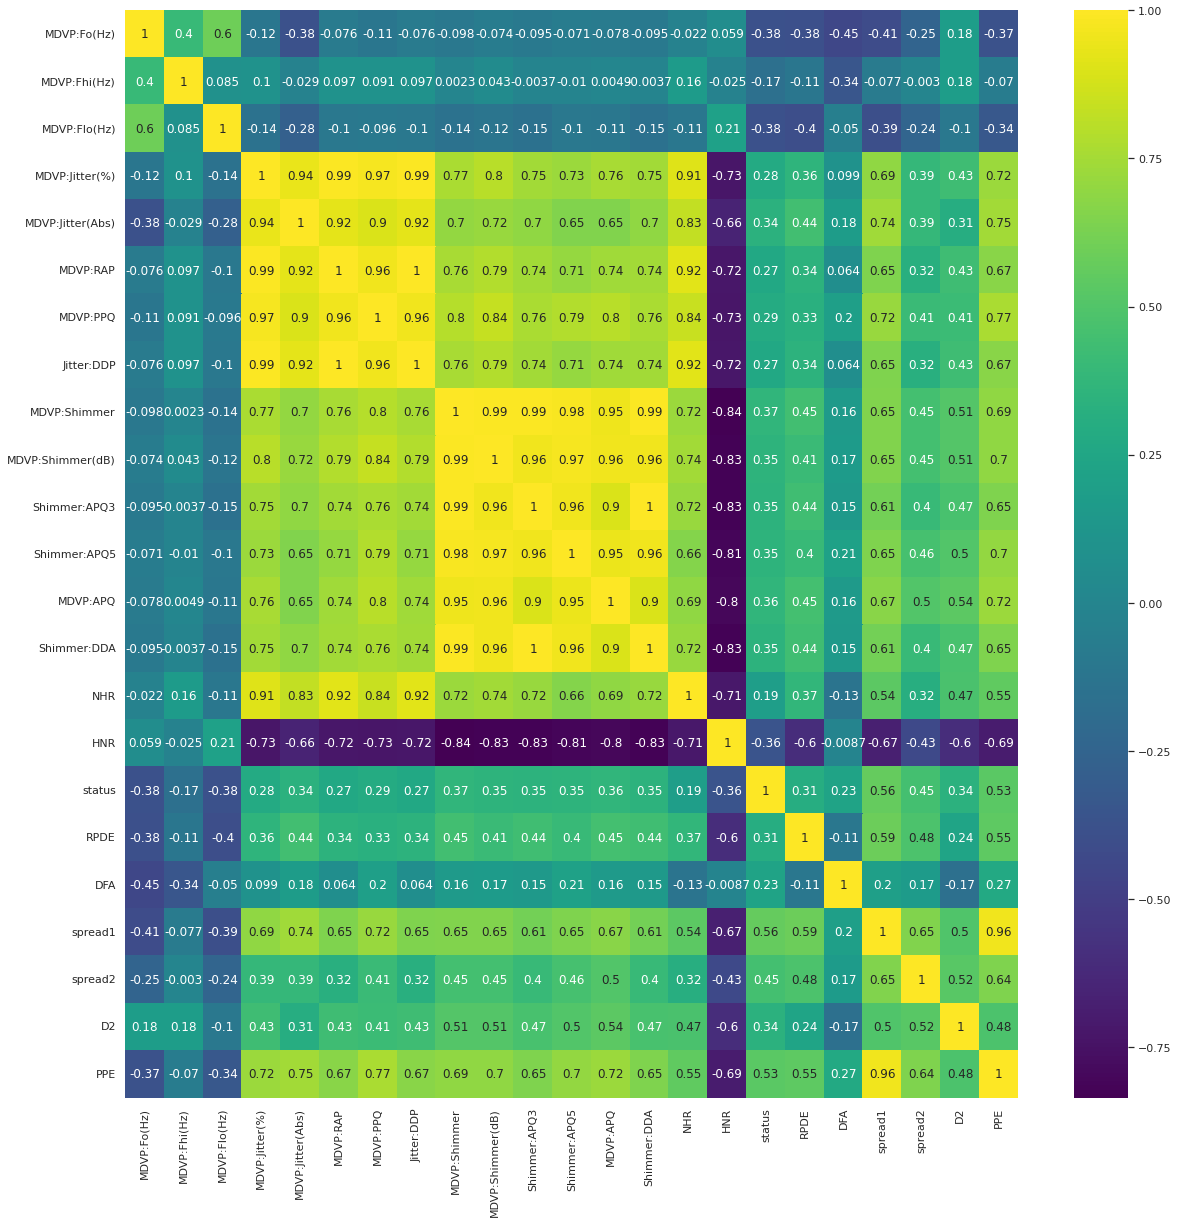

In [5]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), cmap = 'viridis', annot = True)

We see that there are a lot of correlations between the different MDVP variables as well as between spread1 and PPE.

## Split the Features and Targets

In [6]:
x_data = data.drop('status', axis = 1)
print('Shape of Features: ', x_data.shape)
y_data = data['status']
print('Shape of the target: ', y_data.shape)

Shape of Features:  (195, 22)
Shape of the target:  (195,)


## Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
x_scaled = scaler.transform(x_data)

In [8]:
scaled_data = pd.DataFrame(x_scaled, columns = x_data.columns)
scaled_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


## Principal Component Analysis

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

#### Scree Plot

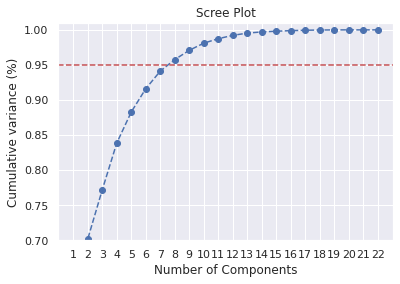

In [10]:
fig, ax = plt.subplots()
xi = np.arange(1, len(scaled_data.columns)+1, 1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 23, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

We note that with just 8 components, we can explain over 95% of the variance in our dataset.

In [11]:
pca = PCA(n_components = 0.95, random_state = 42)
pca.fit(scaled_data)
x_PCA = pca.transform(scaled_data)
print('Shape of x before PCA: ', scaled_data.shape)
print('Shape of x after PCA: ', x_PCA.shape)

Shape of x before PCA:  (195, 22)
Shape of x after PCA:  (195, 8)


In [12]:
columns = ['PCA Compponent 0%i' %i for i in range(1, 9)]
PCA_data  = pd.DataFrame(pca.transform(x_data), columns = columns)
PCA_data.head()

,PCA Compponent 01,PCA Compponent 02,PCA Compponent 03,PCA Compponent 04,PCA Compponent 05,PCA Compponent 06,PCA Compponent 07,PCA Compponent 08
0,-15.568083,151.182946,36.737201,6.465471,-68.061853,62.531807,91.322288,-26.345806
1,-17.455712,164.747231,26.233808,-4.656703,-77.739918,37.543720,105.706945,-26.919125
2,-17.671470,154.585414,20.942153,-7.486110,-73.272299,27.025147,98.302106,-24.181901
3,-17.505308,156.787129,22.887414,-5.800369,-74.590066,31.941854,100.709064,-24.680923
4,-17.060758,157.466017,24.156047,-4.672713,-74.908704,35.092270,101.840566,-25.245292


In [13]:
PCA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PCA Compponent 01  195 non-null    float64
 1   PCA Compponent 02  195 non-null    float64
 2   PCA Compponent 03  195 non-null    float64
 3   PCA Compponent 04  195 non-null    float64
 4   PCA Compponent 05  195 non-null    float64
 5   PCA Compponent 06  195 non-null    float64
 6   PCA Compponent 07  195 non-null    float64
 7   PCA Compponent 08  195 non-null    float64
dtypes: float64(8)
memory usage: 12.3 KB


In [14]:
x = PCA_data.values
y = data['status'].values

## Split into Test and Train sets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (156, 8)
Shape y_train:  (156,)
Shape x_test:  (39, 8)
Shape y_test:  (39,)


## ML Techniques - Imbalanced Dataset

We do not perform Pruning on the Imbalanced data; we would like to know how the performance changes in a general manner.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

### k-Nearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 7)
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)
kNN_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [18]:
y_pred_kNN_train = kNN_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the train set:  0.9038461538461539
Accuracy of the test set:  0.8461538461538461


In [19]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.91      0.91      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.85      0.85      0.85        39



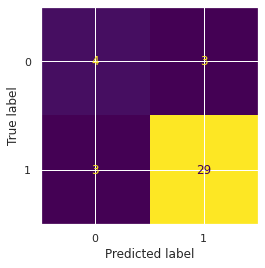

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_kNN, colorbar = False)

### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)
y_pred_NB = NB_classifier.predict(x_test)

In [22]:
y_pred_NB_train = NB_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_NB_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the train set:  0.8012820512820513
Accuracy of the test set:  0.6666666666666666


In [23]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.25      0.43      0.32         7
           1       0.85      0.72      0.78        32

    accuracy                           0.67        39
   macro avg       0.55      0.57      0.55        39
weighted avg       0.74      0.67      0.70        39



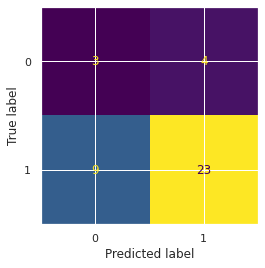

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB, colorbar = False)

### Support Vector Machine

In [25]:
from sklearn.svm import SVC
SVM_classifier = SVC(cache_size=100)
SVM_classifier.fit(x_train, y_train)
y_pred_SVM = SVM_classifier.predict(x_test)
SVM_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 100,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [26]:
y_pred_SVM_train = SVM_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SVM_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SVM))

Accuracy of the train set:  0.8076923076923077
Accuracy of the test set:  0.8461538461538461


In [27]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39



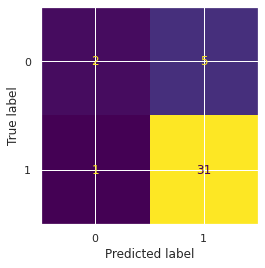

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM, colorbar = False)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(C = 0.01)
LR_classifier.fit(x_train, y_train)
y_pred_LR = LR_classifier.predict(x_test)
LR_classifier.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
y_pred_LR_train = LR_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_LR_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the train set:  0.8333333333333334
Accuracy of the test set:  0.8461538461538461


In [31]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39



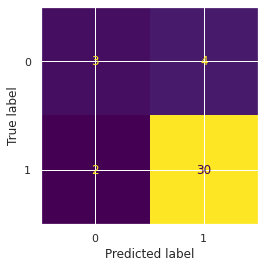

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR, colorbar = False)

### Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(random_state = 42, max_depth = 3) 
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [34]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the train set:  0.8653846153846154
Accuracy of the test set:  0.7948717948717948


There is overfitting, as evident between the huge difference between the accuracy of the training and testing datasets. The overfitting has been prevented to an extent using the hyperparameters max_depth. For further pruning of Decision Trees, one can use GridSearchCV.

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



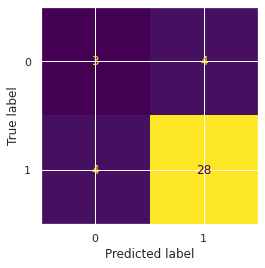

In [35]:
print(classification_report(y_test, y_pred_DT))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT, colorbar=False)

### Random Forests

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42, max_depth = 2)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the train set:  0.8589743589743589
Accuracy of the test set:  0.7948717948717948


The overfitting here has been prevented to an extent using the Hyperparameter max_depth.

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.88      0.88      0.88        32

    accuracy                           0.79        39
   macro avg       0.65      0.65      0.65        39
weighted avg       0.79      0.79      0.79        39



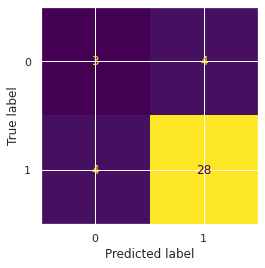

In [38]:
print(classification_report(y_test, y_pred_RF))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF, colorbar=False)

### Accuracy

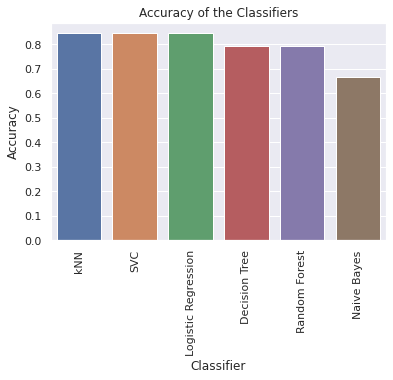

In [39]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest']
accuracy_df['Accuracy'] = [accuracy_score(y_test, y_pred_DT), accuracy_score(y_test, y_pred_kNN), accuracy_score(y_test, y_pred_NB), 
                           accuracy_score(y_test, y_pred_SVM), accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_RF)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

We see that kNN, SVC and Logistic Regression performs the best amongst the algorithms that we have implemented on the dataset with imbalanced target class.

### ROC Curve

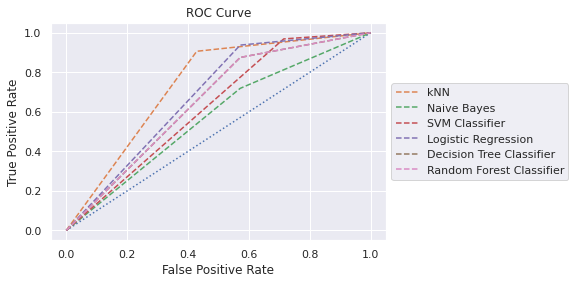

In [40]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

k-Neighbors Classifier has a better ROC Curve compared to the rest of the algorithms we have implemented. Therefore, considering the accuracy and the ROC Curve, kNN Classifier is the best option, since we have to take into account the False positives when dealing with healthcare.

## Balancing the Target Class - Oversampling Technique

### Data Oversampling

In [41]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversample = ADASYN()
X_data,Y_data = oversample.fit_resample(x_data, y_data)
Counter(Y_data)

Counter({1: 147, 0: 146})

In [42]:
Data = pd.DataFrame(X_data, columns = x_data.columns)
Data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       293 non-null    float64
 1   MDVP:Fhi(Hz)      293 non-null    float64
 2   MDVP:Flo(Hz)      293 non-null    float64
 3   MDVP:Jitter(%)    293 non-null    float64
 4   MDVP:Jitter(Abs)  293 non-null    float64
 5   MDVP:RAP          293 non-null    float64
 6   MDVP:PPQ          293 non-null    float64
 7   Jitter:DDP        293 non-null    float64
 8   MDVP:Shimmer      293 non-null    float64
 9   MDVP:Shimmer(dB)  293 non-null    float64
 10  Shimmer:APQ3      293 non-null    float64
 11  Shimmer:APQ5      293 non-null    float64
 12  MDVP:APQ          293 non-null    float64
 13  Shimmer:DDA       293 non-null    float64
 14  NHR               293 non-null    float64
 15  HNR               293 non-null    float64
 16  RPDE              293 non-null    float64
 1

### Standardization

In [44]:
scaler_balanced = StandardScaler()
scaler_balanced.fit(X_data)
X_scaled = scaler_balanced.transform(X_data)

In [45]:
Scaled_Data = pd.DataFrame(X_scaled, columns = X_data.columns)
Scaled_Data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.814824,-0.456272,-0.944501,0.498076,1.007874,0.281188,1.018876,0.279743,1.078368,1.062991,...,0.598537,0.908929,-0.012405,-0.348562,-0.724135,1.951620,1.113198,0.737352,-0.081889,1.200576
1,-0.757725,-0.547675,0.059751,0.937228,1.344349,0.653132,1.621609,0.651696,2.157870,2.254194,...,1.560990,1.992038,-0.092303,-0.840980,-0.281863,2.033489,1.869233,1.615183,0.441537,2.243086
2,-0.893311,-0.732963,0.001185,1.132937,1.680824,0.962433,1.982401,0.963615,1.605239,1.396528,...,1.024992,1.562660,-0.267965,-0.445124,-0.570757,2.144947,1.492171,1.305031,0.033338,1.795906
3,-0.893453,-0.661548,-0.003704,1.006442,1.680824,0.797995,1.630099,0.796562,1.764097,1.604988,...,1.150380,1.752526,-0.255499,-0.446894,-0.519259,2.027961,1.825881,1.596853,0.212022,2.246821
4,-0.909151,-0.620241,-0.022096,1.691423,2.353774,1.397021,2.521466,1.398213,2.336356,2.004041,...,1.627817,2.396404,-0.138202,-0.698411,-0.698021,2.110081,2.204713,0.331273,0.004885,2.760011


In [46]:
Scaled_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       293 non-null    float64
 1   MDVP:Fhi(Hz)      293 non-null    float64
 2   MDVP:Flo(Hz)      293 non-null    float64
 3   MDVP:Jitter(%)    293 non-null    float64
 4   MDVP:Jitter(Abs)  293 non-null    float64
 5   MDVP:RAP          293 non-null    float64
 6   MDVP:PPQ          293 non-null    float64
 7   Jitter:DDP        293 non-null    float64
 8   MDVP:Shimmer      293 non-null    float64
 9   MDVP:Shimmer(dB)  293 non-null    float64
 10  Shimmer:APQ3      293 non-null    float64
 11  Shimmer:APQ5      293 non-null    float64
 12  MDVP:APQ          293 non-null    float64
 13  Shimmer:DDA       293 non-null    float64
 14  NHR               293 non-null    float64
 15  HNR               293 non-null    float64
 16  RPDE              293 non-null    float64
 1

### Principal Component Analysis
Do the PCA on the balanced data:

In [47]:
pca_balanced = PCA()
pca_balanced.fit(Scaled_Data)
pca_balanced.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

#### Scree Plot

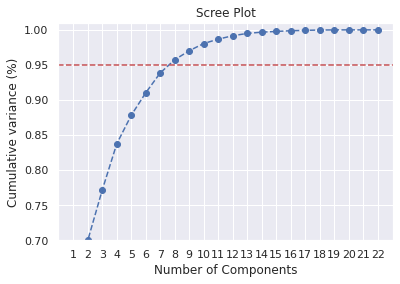

In [48]:
fig, ax = plt.subplots()
xi = np.arange(1, len(Scaled_Data.columns)+1, 1)
yi = np.cumsum(pca_balanced.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 23, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
ax.set_ylim([0.70, 1.01])
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

In [49]:
pca_balanced = PCA(n_components=0.95, random_state = 42)
pca_balanced.fit(Scaled_Data)
X_PCA = pca_balanced.transform(Scaled_Data)
print('Shape of X before PCA: ', Scaled_Data.shape)
print('Shape of X after PCA: ', X_PCA.shape)

Shape of X before PCA:  (293, 22)
Shape of X after PCA:  (293, 8)


In [50]:
columns_PCA = ['PCA Compponent 0%i' %i for i in range(1, 9)]
PCA_Data = pd.DataFrame(pca_balanced.transform(X_data), columns = columns_PCA)
PCA_Data.head()

,PCA Compponent 01,PCA Compponent 02,PCA Compponent 03,PCA Compponent 04,PCA Compponent 05,PCA Compponent 06,PCA Compponent 07,PCA Compponent 08
0,-10.574122,139.862438,11.990974,-25.530032,-64.752084,-8.363399,124.380273,-15.266380
1,-11.965034,146.532576,32.868480,-20.282735,-80.241170,17.735623,125.953464,-17.839258
2,-12.459703,136.272901,35.888255,-16.934173,-77.079460,22.337565,112.999112,-16.650126
3,-12.257997,138.695380,33.908800,-17.970639,-77.615382,19.851155,118.184143,-16.917815
4,-11.818555,139.661069,32.331511,-18.676216,-77.409799,18.074843,121.002899,-17.171217


In [51]:
X = PCA_Data.values
Y = Y_data.values

### Split into Train and Test sets

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)
print('x_train shape: ', X_train.shape)
print('x_test shape: ', X_test.shape)
print('y_train shape: ', Y_train.shape)
print('y_test shape: ', Y_test.shape)

x_train shape:  (234, 8)
x_test shape:  (59, 8)
y_train shape:  (234,)
y_test shape:  (59,)


## ML Techniques - Balanced Target class

### k-Neighbours Classifier

We can quickly tweak the n_neighbors to prevent overfitting.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier_balanced = KNeighborsClassifier()
kNN_classifier_balanced.fit(X_train, Y_train)
kNN_classifier_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
y_pred_kNN_balanced = kNN_classifier_balanced.predict(X_test)
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_kNN_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of the training set:  0.8931623931623932
Accuracy of the testing set:  0.8135593220338984


              precision    recall  f1-score   support

           0       0.74      0.97      0.84        30
           1       0.95      0.66      0.78        29

    accuracy                           0.81        59
   macro avg       0.85      0.81      0.81        59
weighted avg       0.85      0.81      0.81        59



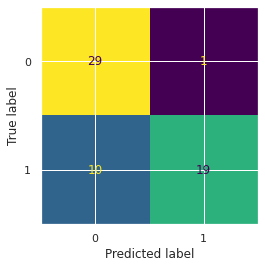

In [55]:
print(classification_report(Y_test, y_pred_kNN_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar=False)

### Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
NB_classifier_balanced = GaussianNB()
NB_classifier_balanced.fit(X_train, Y_train)
NB_classifier_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [57]:
y_pred_NB_balanced = NB_classifier_balanced.predict(X_test)
y_pred_NB_train_balanced = NB_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_NB_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_NB_balanced))

Accuracy of the training set:  0.6153846153846154
Accuracy of the testing set:  0.6440677966101694


              precision    recall  f1-score   support

           0       0.74      0.47      0.57        30
           1       0.60      0.83      0.70        29

    accuracy                           0.64        59
   macro avg       0.67      0.65      0.63        59
weighted avg       0.67      0.64      0.63        59



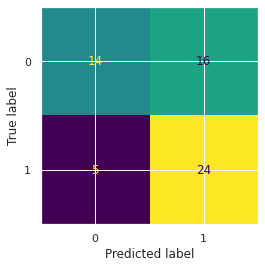

In [58]:
print(classification_report(Y_test, y_pred_NB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_NB_balanced, colorbar=False)

### Support Vector Machine

In [59]:
SVM_classifier_balanced = SVC(random_state = 42)
SVM_classifier_balanced.fit(X_train, Y_train)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(X_test)

In [60]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_SVM_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_SVM_balanced))

Accuracy of the training set:  0.6623931623931624
Accuracy of the testing set:  0.6779661016949152


In [61]:
print(classification_report(Y_test, y_pred_SVM_balanced))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65        30
           1       0.65      0.76      0.70        29

    accuracy                           0.68        59
   macro avg       0.68      0.68      0.68        59
weighted avg       0.68      0.68      0.68        59



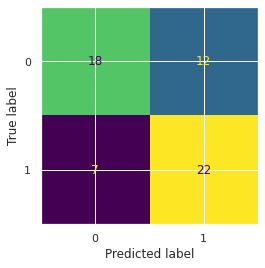

In [62]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_SVM_balanced, colorbar=False)

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR_classifier_balanced = LogisticRegression(C = 0.01, random_state = 42)
LR_classifier_balanced.fit(X_train, Y_train)
LR_classifier_balanced.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [64]:
y_pred_LR_balanced = LR_classifier_balanced.predict(X_test)
y_pred_LR_train_balanced = LR_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_LR_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_LR_balanced))

Accuracy of the training set:  0.6367521367521367
Accuracy of the testing set:  0.6779661016949152


In [65]:
print(classification_report(Y_test, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.66      0.72      0.69        29

    accuracy                           0.68        59
   macro avg       0.68      0.68      0.68        59
weighted avg       0.68      0.68      0.68        59



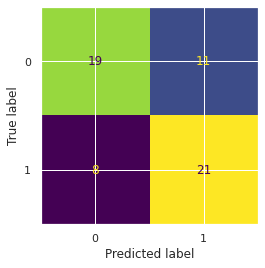

In [66]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_LR_balanced, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier(max_depth = 5)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [68]:
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)
y_pred_DT_train_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_DT_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of the training set:  0.9444444444444444
Accuracy of the testing set:  0.7966101694915254


              precision    recall  f1-score   support

           0       0.74      0.93      0.82        30
           1       0.90      0.66      0.76        29

    accuracy                           0.80        59
   macro avg       0.82      0.79      0.79        59
weighted avg       0.82      0.80      0.79        59



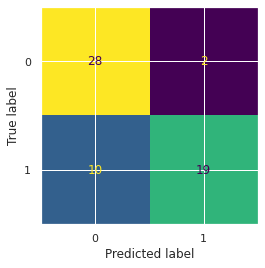

In [69]:
print(classification_report(Y_test, y_pred_DT_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to control overfitting - we still need to fine-tune the hyperparameters in order to prevent overfitting.

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier(max_depth=4)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [71]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_pred_RF_train_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_RF_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of the training set:  0.9017094017094017
Accuracy of the testing set:  0.8135593220338984


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.69      0.78        29

    accuracy                           0.81        59
   macro avg       0.83      0.81      0.81        59
weighted avg       0.83      0.81      0.81        59



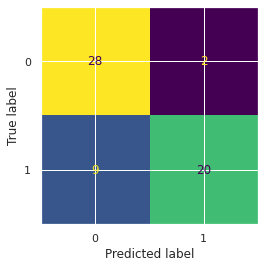

In [72]:
print(classification_report(Y_test, y_pred_RF_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar=False)

### AdaBoost Classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_balanced = AdaBoostClassifier()
adaboost_balanced.fit(X_train, Y_train)
adaboost_balanced.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [74]:
y_pred_Adaboost_balanced = adaboost_balanced.predict(X_test)
print('Accuracy of the training set: ', adaboost_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Adaboost_balanced))

Accuracy of the training set:  0.9786324786324786
Accuracy of the testing set:  0.8135593220338984


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.69      0.78        29

    accuracy                           0.81        59
   macro avg       0.83      0.81      0.81        59
weighted avg       0.83      0.81      0.81        59



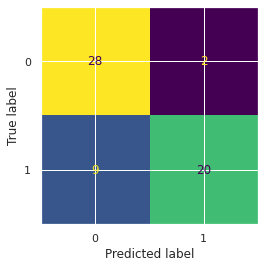

In [75]:
print(classification_report(Y_test, y_pred_Adaboost_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Adaboost_balanced, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [76]:
from xgboost import XGBClassifier
xgb_classifier_balanced = XGBClassifier(random_state = 42, n_estimators = 50, learning_rate = 0.05)
xgb_classifier_balanced.fit(X_train, Y_train)
xgb_classifier_balanced.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [77]:
y_pred_XGB_balanced = xgb_classifier_balanced.predict(X_test)
print('Accuracy of the training set: ', xgb_classifier_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_XGB_balanced))

Accuracy of the training set:  0.9358974358974359
Accuracy of the testing set:  0.8305084745762712


              precision    recall  f1-score   support

           0       0.76      0.97      0.85        30
           1       0.95      0.69      0.80        29

    accuracy                           0.83        59
   macro avg       0.86      0.83      0.83        59
weighted avg       0.86      0.83      0.83        59



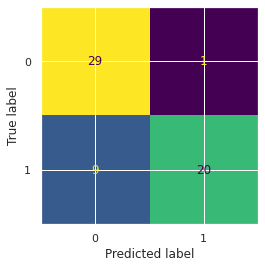

In [78]:
print(classification_report(Y_test, y_pred_XGB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_XGB_balanced, colorbar=False)

### Voting Classifier

In [79]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators = [('kNN', kNN_classifier_balanced), ('NB', NB_classifier_balanced), ('SVM', SVM_classifier_balanced),
                                    ('LR', LR_classifier_balanced), ('DT', DT_classifier_balanced), ('RF', RF_classifier_balanced), 
                                    ('Adaboost', adaboost_balanced), ('XGB', xgb_classifier_balanced)], voting = 'hard')
VC.fit(X_train, Y_train)
VC.get_params()

{'estimators': [('kNN', KNeighborsClassifier()),
  ('NB', GaussianNB()),
  ('SVM', SVC(random_state=42)),
  ('LR', LogisticRegression(C=0.01, random_state=42)),
  ('DT', DecisionTreeClassifier(max_depth=5)),
  ('RF', RandomForestClassifier(max_depth=4)),
  ('Adaboost', AdaBoostClassifier()),
  ('XGB',
   XGBClassifier(learning_rate=0.05, n_estimators=50, random_state=42))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'kNN': KNeighborsClassifier(),
 'NB': GaussianNB(),
 'SVM': SVC(random_state=42),
 'LR': LogisticRegression(C=0.01, random_state=42),
 'DT': DecisionTreeClassifier(max_depth=5),
 'RF': RandomForestClassifier(max_depth=4),
 'Adaboost': AdaBoostClassifier(),
 'XGB': XGBClassifier(learning_rate=0.05, n_estimators=50, random_state=42),
 'kNN__algorithm': 'auto',
 'kNN__leaf_size': 30,
 'kNN__metric': 'minkowski',
 'kNN__metric_params': None,
 'kNN__n_jobs': None,
 'kNN__n_neighbors': 5,
 'kNN__p': 2,
 'kNN__weights': 'u

In [80]:
y_pred_VC_balanced = VC.predict(X_test)
print('Accuracy of the training set: ', VC.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_VC_balanced))

Accuracy of the training set:  0.9273504273504274
Accuracy of the testing set:  0.8135593220338984


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.69      0.78        29

    accuracy                           0.81        59
   macro avg       0.83      0.81      0.81        59
weighted avg       0.83      0.81      0.81        59



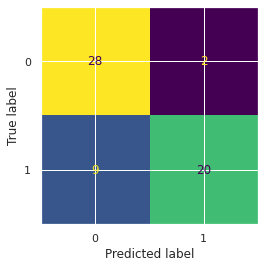

In [81]:
print(classification_report(Y_test, y_pred_VC_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_VC_balanced, colorbar=False)

### Accuracy

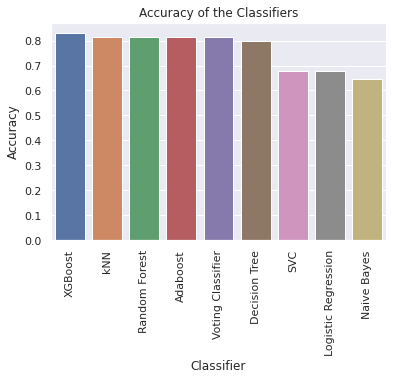

In [82]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'Adaboost', 
                             'XGBoost', 'Voting Classifier']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_NB_balanced), accuracy_score(Y_test, y_pred_SVM_balanced), 
                           accuracy_score(Y_test, y_pred_LR_balanced), accuracy_score(Y_test, y_pred_RF_balanced),
                           accuracy_score(Y_test, y_pred_Adaboost_balanced), accuracy_score(Y_test, y_pred_XGB_balanced), 
                           accuracy_score(Y_test, y_pred_VC_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

Adaboost, Voting Classifier and Decision Tree Classifier produces the highest accuracy at about 85% of the algorithms implemented upon balancing the target class. It is closely followed by XGBoost and kNN which also has an accuracy close to 80%.

### ROC Curve

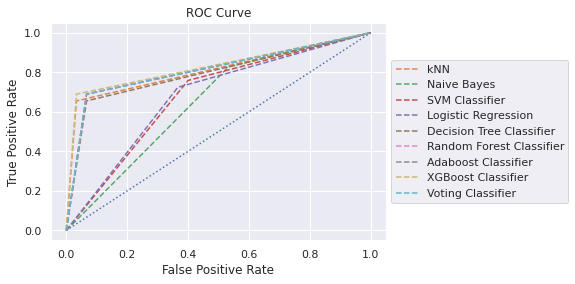

In [83]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_DT_balanced)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(Y_test, y_pred_RF_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(Y_test, y_pred_Adaboost_balanced)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(Y_test, y_pred_XGB_balanced)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
fpr9, tpr9, thresholds = roc_curve(Y_test, y_pred_VC_balanced)
plt.plot(fpr9, tpr9, '--', label='Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Adaboost Classifier and XGBoost Classifier easily stands out from the rest of the algorithms on the ROC Curve - they have nearly zero False Positive Rate! Considering the accuracy and the ROC Curve, We can choose Adaboost Classifier for the case where the target class is balanced.

## Conclusion

In healthcare, we have to take the False Positives and Negatives into account, since they can either have significant consequences on the society as a whole or on the patients themselves. Thus, accuracy alone cannot be used to judge a classifier's performance - we must also take into account the impact and the consequences that our model will have to face if we deploy it in the real-world. 

In this particular case, upon balancing the target class, Adaboost Classifier works best among the classifiers we have implemented. However, it is still not a perfect classifier and we have to investigate the performance of the classifier further on newer test data to understand its limits.

## Miscellaneous - LazyPredict Library

You may need to install the LazyPredict Library if you have not already done so:


```
!pip install lazypredict
```



In [84]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [85]:
lazypredict_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None, random_state = 42)
model, predictions = lazypredict_classifier.fit(X_train, X_test, Y_train, Y_test)
model

100%|██████████| 29/29 [00:02<00:00, 14.14it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.93,0.93,0.93,0.93,0.02
LinearDiscriminantAnalysis,0.90,0.90,0.90,0.90,0.05
ExtraTreeClassifier,0.85,0.85,0.85,0.85,0.02
ExtraTreesClassifier,0.85,0.85,0.85,0.84,0.29
LGBMClassifier,0.85,0.84,0.84,0.84,0.14
XGBClassifier,0.85,0.84,0.84,0.84,0.06
SVC,0.85,0.84,0.84,0.84,0.05
RidgeClassifierCV,0.83,0.83,0.83,0.83,0.04
NuSVC,0.83,0.83,0.83,0.83,0.02


We see that Adaboost Classifier is amongst the top five, with about 86% accuracy, which is in line with our Manual implementation of the algorithm.

## Note

There are cases where the accuracy of the training set is lower than that of the testing set. It does not necessarily mean overfitting; given the size of the dataset, it may be by chance. 

Thus, it is advisable to run the train/test split without the random seed, should the situation occur.